# REGRESION LINEAL
## 1. Introducción
La regresión lineal trata de ajustar modelos lineales entre una variable dependiente y una o más variables independientes.

A partir de los análisis de regresión lineal múltiple podemos identificar que variables independientes explican una variable dependiente, cuantiicar dicha relación y predecir valores de una variable.

<img src=https://miro.medium.com/max/1900/1*TzBsVJUXqofGqdsBJRvXEw.png>


## 2. Breve Historia de la Regresión

Las ideas modernas sobre regresión se originan en los trabajo de Legendre y Gauss, sobre el método de mínimos cuadrados, para ajustar los datos sobre las órbitas de cuerpos celestes. El primer estudio documentado sobre el método de mínimos cuadrados, de donde deriva la idea de regresión, es debido a Legendre (1752-1833) en 1805. Esta técnica de optimización intenta encontrar la función (dentro de una familia) que mejor se ajusta a los datos bivariantes, de acuerdo con el criterio de mínimo error cuadrático, y siempre que los datos cumplan algunas condiciones (como independencia).

Se conocían las ecuaciones funcionales de estas órbitas, pero los errores de medida hacía que los cálculos fuesen aproximados y se ajustaban ciertas familias de funciones, usando la teoría de errores (y la distribución normal para describirlos). En 1829 Gauss fue capaz de establecer la razón por la cual este procedimiento es muy adecuado desde el punto de vista estadístico, mediante lo que hoy se conoce como teorema de Gauss-Markov, que muestra que los estimadores obtenidos con este método
son insesgados y no se requiere una distribución específica para los datos que se ajustan. El impulso posterior lo dan los trabajos citados de Galton y Pearson sobre la herencia. Yule la utiliza para el estudio de fenómenos sociales, como las causas de pobreza alrededor de 1899. 

El término regresión se utilizó por primera vez en el estudio de variables antropométricas: al comparar la estatura de padres e hijos, resultó que los hijos cuyos padres tenían una estatura muy superior al valor medio tendían a igualarse a éste, mientras que aquellos cuyos padres eran muy bajos tendían a reducir su diferencia respecto a la estatura media; es decir, "regresaban" al promedio. La constatación empírica de esta propiedad se vio reforzada más tarde con la justificación teórica de ese fenómeno.

El término lineal se emplea para distinguirlo del resto de técnicas de regresión, que emplean modelos basados en cualquier clase de función matemática. Los modelos lineales son una explicación simplificada de la realidad, mucho más ágil y con un soporte teórico por parte de la matemática y la estadística mucho más extenso.

<img src=https://www.iartificial.net/wp-content/uploads/2019/01/Carl_Friedrich_Gauss_1840_by_Jensen-235x300.webp>

Estas y otros muy interesantes hechos históricos del desarrollo de la regresión están contenidos en el trabajo "Algunas notas históricas sobre la correlación y regresión y su uso en el aula":
[Notas históricas sobre la Regresión](https://core.ac.uk/download/pdf/20343739.pdf)

## 3. Algoritmo

En su expresión más simple la regresión linear busca justra una linea dterminada por dos parámetros: un intercepto ($\beta_0$) y una pendiente ($\beta_1$). De esta amnera el modelo lineal puede ser representado por:

 $$ \mathrm{y} = \beta_0 + \beta_1 \mathrm{x} + \mathrm{error} $$

La interpretación del coefciente $\beta_1$ is la siguiente: un  incremento en una unidad de $x$ en edad conducirá en promedio a un cambio de $\beta_1$ en $y$. El intercepto $\beta_0$ se puede considerar como una especie de "base" de $y$.

El $error$ representa la difenrecia entre el valor real y el predicho por la regresión.

## 4. Ejemplo

Se usa la base de datos **glassdoordata.csv provista por un departamento de recursos humanos y que contiene información de un conujunto de empleados incluyendo variables como edad, desempeño, educación, ingresos, antigüedad, etc. 

Se usará la regresión lineal para cuantificar la relación entre la variable dependiente (salario) y algunas variables independientes, por ejemplo, educación, ingresos, antigüedad, etc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 

### Exploración de datos

In [2]:
data = pd.read_csv('glassdoordata.csv')

In [3]:
data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


Definimos la variable **pay**, pago total, como la suma de **income** (ingreso) y **bonus** (bono)

In [4]:
data['pay'] = data['income'] + data['bonus']

In [5]:
data.head()

,jobtitle,gender,age,performance,education,department,seniority,income,bonus,pay
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,Male,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319,108783


In [6]:
data.shape

(1000, 10)

In [7]:
data.describe()

,age,performance,seniority,income,bonus,pay
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000,100939.814000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365,25156.599655
min,18.000000,1.000000,1.000000,34208.000000,1703.000000,40828.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000,83443.000000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000,100047.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000,117656.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000,184010.000000


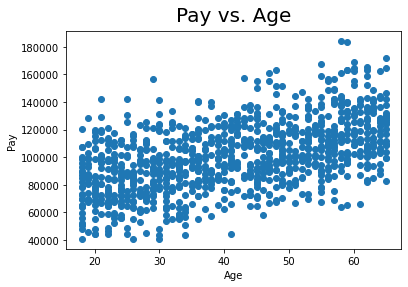

In [8]:
plt.scatter(data['age'],data['pay'])
plt.title("Pay vs. Age", fontsize=20, verticalalignment='bottom');
plt.xlabel("Age");
plt.ylabel("Pay");

In [9]:
x = np.array(data["age"]).reshape(-1,1)

In [10]:
y = data["pay"]
y

0       52301
1      119604
2       99476
3      118234
4      108783
        ...  
995     65914
996    112544
997     95071
998     99601
999    125352
Name: pay, Length: 1000, dtype: int64

In [11]:
# Se crea una instancia de LinearRegression
regr = LinearRegression() 

# Se instruye a la regresión lineal para que aprenda de los datos (x,y)
regr.fit(x,y) 

# Se imprimen los parámetros estimados por la regresión lineal
print('w = ' + str(regr.coef_) + ', b = ' + str(regr.intercept_))

w = [939.25012771], b = 62061.43346355485


In [12]:
R_sq = regr.score(x,y)
print (R_sq)

0.2848512885110833


## 5. Conclusiones

Llevar a cabo un Análisis Exploratorios de Datos antes de construir cualquier modelo es importante para descubrir y tener en cuenta las posibles relaciones entre variables.

El uso de sklearn permite empezar a programar y estructurar de manera básica primeros análisis datos y modelado estadístico en Python.